<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Размер-выборки" data-toc-modified-id="Размер-выборки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Размер выборки</a></span></li><li><span><a href="#Распределение-возраста-в-выборке" data-toc-modified-id="Распределение-возраста-в-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Распределение возраста в выборке</a></span></li><li><span><a href="#Пример-фотографий-из-датасета" data-toc-modified-id="Пример-фотографий-из-датасета-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Пример фотографий из датасета</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист</a></span></li></ul></div>

# Определение возраста покупателей

**Описание проекта**

Сетевой супермаркет внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:
- Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- Контролировать добросовестность кассиров при продаже алкоголя.

**Задача:**
Построить модель, которая по фотографии определит приблизительный возраст человека со значением метрики *MAE* на тестовой выборке не больше 8. 
 
**Исходные данные:**
Набор фотографий людей с указанием возраста

## Исследовательский анализ данных

### Размер выборки

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Задаем значения констант
RANDOM_STATE = 42

In [3]:
# Функция для вывода графика количественных признаков
def graph_quant_feature(df, col_name, col_title):
    
    """
    Функция в качестве аргументов принимает датафрейм, название столбца, для которого необходимо вывести график, 
    и общее название для 2-х графиков. Она выводит гистограмму и диаграмму размаха для полученных данных
    """
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
    bins = int(np.log2(len(df[col_name])) + 1)
    
    sns.histplot(df[col_name], bins=bins, ax=axes[0], palette='deep', edgecolor='black')
    axes[0].set_xlabel('Возраст')
    axes[0].set_ylabel('Количество изображений')
    axes[0].set_title('Гистограмма')
    axes[0].grid(True)
    
    sns.boxplot(x=df[col_name], orient='h', ax=axes[1], color='orange')
    axes[1].set_xlabel('Возраст')
    axes[1].set_title('Диаграмма размаха')
    
    plt.suptitle(col_title)
    plt.show()
    
    print(f'Рассмотрим описательную статистику:\n{df[col_name].describe()}')

In [4]:
# Загружаем данные о метках возрастов для каждого изображения
try:
    target_df = pd.read_csv('/datasets/faces/labels.csv')
    
except Exception as e:
    print(f"Произошла ошибка: {e}")

# Выводим первые 3 строки загруженных данных
target_df.head(3)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80


In [5]:
# Выводим основную информацию по загруженным данным
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [6]:
# Создаём генератор изображений и соответствующих возрастов из датафрейма target_df 
# с предварительной нормализацией пикселей
datagen = ImageDataGenerator(rescale=1./255)

train_datagen = datagen.flow_from_dataframe(dataframe=target_df,
                                            directory='/datasets/faces/final_files',
                                            x_col='file_name',
                                            y_col='real_age',
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='raw',
                                            seed=RANDOM_STATE)

Found 7591 validated image filenames.


В исходном датасете содержится 7591 изображение, для каждого из которых указано соответствующее значение возраста человека.

### Распределение возраста в выборке

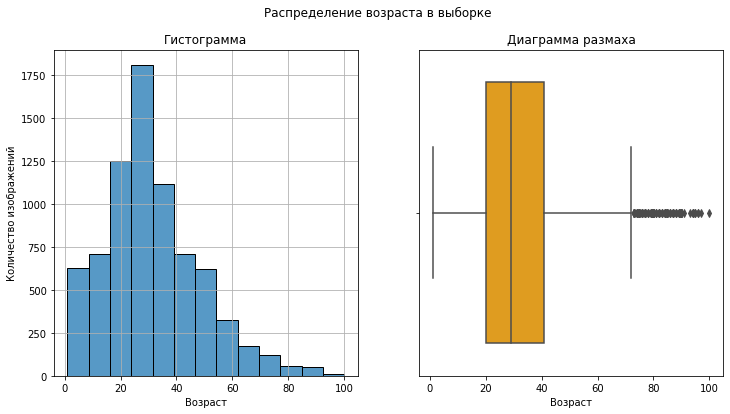

Рассмотрим описательную статистику:
count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64


In [7]:
# Рассмотрим распределение возраста в выборке
graph_quant_feature(target_df, 'real_age', 'Распределение возраста в выборке')

Возрастной диапазон в выборке составляет от 1 до 100 лет. Наибольшее число изображений приходится на интервал от 20 до 40 лет, с пиком в возрасте 29 лет. После 50 лет наблюдается резкое снижение количества примеров, а изображения людей старше 70 лет являются статистически редкими для данной выборки.

### Пример фотографий из датасета

In [8]:
# Получаем batch изображений и их возрастные метки
feature, target = next(train_datagen)

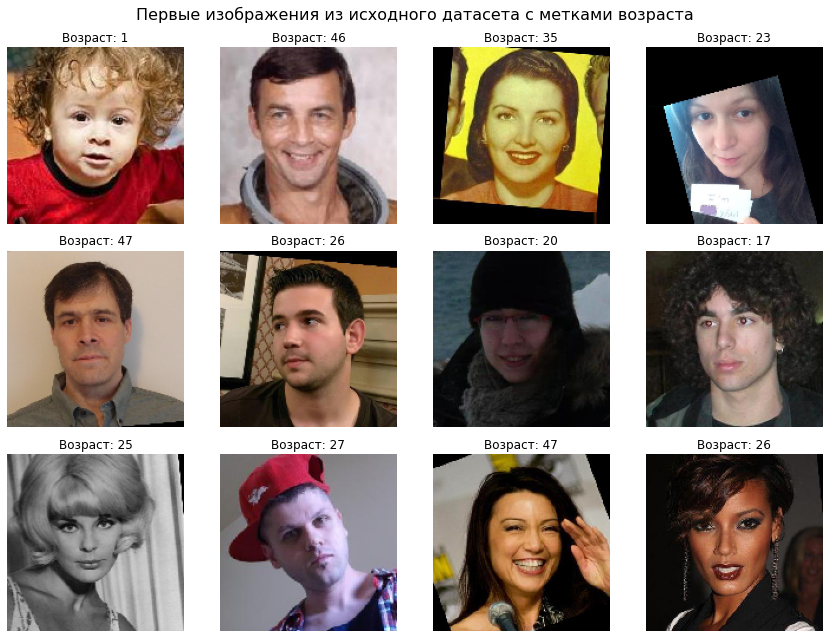

In [9]:
# Выводим первые изображения из исходного датасета с метками возрастов
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

for i in range(12):
    axes[i].imshow(np.array(feature[i]))
    axes[i].set_title(f'Возраст: {target[i]}')
    axes[i].axis('off')

plt.suptitle('Первые изображения из исходного датасета с метками возраста', fontsize=16)
plt.tight_layout()
plt.show()

После применения нормализации изображения отображаются в хорошем качестве: лица четко видны и занимают большую часть кадра. Все изображения имеют три цветовых канала. На некоторых фотографиях присутствуют черные границы заполнения, что делает выборку более разнообразной.

Возрастные метки, визуально оценённые и присвоенные фотографиям, в целом соответствуют реальному возрасту изображённых людей.

### Вывод по разделу

Наличие дисбаланса в распределении возрастов, особенно недостатка примеров старше 50 лет, может привести к снижению точности предсказаний в этой возрастной группе. Модель будет склонна переоценивать возраст молодых людей и недооценивать пожилых. Для повышения обобщающей способности на весь возрастной диапазон может потребоваться аугментация изображений старших возрастов.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd


def load_train(path):
    target_df = pd.read_csv(f'{path}/labels.csv')

    datagen = ImageDataGenerator(validation_split=0.25, 
                                 rescale=1./255,
                                 rotation_range=20,
                                 width_shift_range=0.1,
                                 zoom_range=0.1)

    train_generator = datagen.flow_from_dataframe(dataframe=target_df,
                                                  directory=f'{path}/final_files',
                                                  x_col='file_name',
                                                  y_col='real_age',
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='raw',
                                                  subset='training',
                                                  seed=42)

    return train_generator


def load_test(path):
    target_df = pd.read_csv(f'{path}/labels.csv')

    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    test_generator = datagen.flow_from_dataframe(dataframe=target_df,
                                                directory=f'{path}/final_files',
                                                x_col='file_name',
                                                y_col='real_age',
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='raw',
                                                subset='validation',
                                                seed=42)

    return test_generator


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False)
    
    backbone.trainable = True

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=17, steps_per_epoch=None, validation_steps=None):  
    model.fit(train_data, 
              validation_data=test_data, 
              epochs=epochs,
              steps_per_epoch=len(train_data),
              validation_steps=len(test_data),
              verbose=2)
    
    return model


```

```

Train for 178 steps, validate for 60 steps
Epoch 1/17
178/178 - 98s - loss: 205.8429 - mae: 10.8466 - val_loss: 446.1017 - val_mae: 15.9602
Epoch 2/17
178/178 - 60s - loss: 130.7408 - mae: 8.6921 - val_loss: 316.5642 - val_mae: 13.1484
Epoch 3/17
178/178 - 60s - loss: 113.8771 - mae: 8.1507 - val_loss: 324.2105 - val_mae: 13.3055
Epoch 4/17
178/178 - 60s - loss: 102.6306 - mae: 7.7615 - val_loss: 222.5322 - val_mae: 10.9173
Epoch 5/17
178/178 - 60s - loss: 89.1510 - mae: 7.1918 - val_loss: 126.5465 - val_mae: 8.5175
Epoch 6/17
178/178 - 60s - loss: 85.1406 - mae: 7.0247 - val_loss: 122.2239 - val_mae: 8.2029
Epoch 7/17
178/178 - 60s - loss: 73.2892 - mae: 6.5422 - val_loss: 196.9506 - val_mae: 11.5199
Epoch 8/17
178/178 - 60s - loss: 71.1946 - mae: 6.4251 - val_loss: 216.8076 - val_mae: 10.6604
Epoch 9/17
178/178 - 60s - loss: 63.9164 - mae: 6.1779 - val_loss: 91.7776 - val_mae: 7.3764
Epoch 10/17
178/178 - 60s - loss: 63.7823 - mae: 6.0849 - val_loss: 120.1036 - val_mae: 8.3512
Epoch 11/17
178/178 - 60s - loss: 58.6178 - mae: 5.8500 - val_loss: 96.4684 - val_mae: 7.2823
Epoch 12/17
178/178 - 60s - loss: 48.6550 - mae: 5.3615 - val_loss: 112.4214 - val_mae: 7.9289
Epoch 13/17
178/178 - 60s - loss: 48.3369 - mae: 5.3360 - val_loss: 109.1081 - val_mae: 8.1195
Epoch 14/17
178/178 - 60s - loss: 51.3122 - mae: 5.4806 - val_loss: 93.7649 - val_mae: 7.2259
Epoch 15/17
178/178 - 60s - loss: 44.5506 - mae: 5.1475 - val_loss: 95.2082 - val_mae: 7.5517
Epoch 16/17
178/178 - 60s - loss: 38.3516 - mae: 4.8119 - val_loss: 98.8589 - val_mae: 7.4312
Epoch 17/17
178/178 - 60s - loss: 34.4919 - mae: 4.4974 - val_loss: 90.3931 - val_mae: 7.0135
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 9s - loss: 90.3931 - mae: 7.0135

```

**Вывод по разделу:** 

Модель сверточной нейронной сети построена на основе архитектуры ResNet50. За 17 эпох обучения с минимизацией ошибки MSE удалось достичь значения метрики MAE, равного 7.0135, что соответствует условию задачи.

Предположительно, при увеличении количества изображений людей в возрасте до 20 и старше 40 лет — например, с помощью методов аугментации — модель могла бы обучиться быстрее и точнее. Значение MAE на обучающей выборке незначительно отличается от MAE на тестовой, что свидетельствует об отсутствии переобучения.

## Анализ обученной модели

Модель с достаточно высокой точностью научилась предсказывать возраст людей по фотографии, что, как минимум, позволяет уверенно выделять возрастные группы, так как погрешность в пределах 7 лет не является критичной для подобных задач. Однако для применения модели, при выявлении недобросовестных кассиров, продающих алкоголь несовершеннолетним, такая ошибка может оказаться слишком значительной.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы